# Clustering

In [1]:
#Import the necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import string
import contractions
import unicodedata
import re
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns 
import warnings

In [2]:
# Import Data
df = pd.read_csv("scraping_news_cc.csv")

In [3]:
df

,Title,Description,Link
0,Moderate Dems silent as Biden skirts Senate co...,Senate Democrats were silent when asked by Fox...,/politics/moderate-dems-silent-biden-skirts-se...
1,DC jury orders conservative commentator to pay...,Two conservative commentators were found guilt...,/politics/dc-jury-orders-conservative-commenta...
2,AOC declares victory in fight for Green New De...,Rep. Alexandria Ocasio-Cortez declared victory...,/politics/aoc-declares-victory-fight-green-new...
3,Why gas stove owners should still be worried,The Biden administration is backtracking on en...,/opinion/why-gas-stove-owners-should-still-wor...
4,State AGs warn Biden's natural gas moratorium ...,FIRST ON FOX: A group of nearly two dozen stat...,/politics/state-ags-warn-bidens-natural-gas-mo...
...,...,...,...
245,John Kerry's climate office faces GOP Oversigh...,FIRST ON FOX: The House Oversight Committee is...,/politics/john-kerrys-climate-office-faces-gop...
246,Biden's latest climate rules crack down on man...,The Environmental Protection Agency unveiled a...,/politics/bidens-latest-climate-rules-crack-do...
247,Biden admin sued for hiding John Kerry's staff...,FIRST ON FOX: The Biden administration was hit...,/politics/biden-admin-sued-hiding-john-kerrys-...
248,TikTok activist says he advised White House on...,A climate change activist who has a large foll...,/politics/tiktok-activist-says-he-advised-whit...


In [4]:
#Making a copy for further cleaning and pre-processing
df_1=df

In [5]:
#Data Cleaning and Preprocessing
df_1['Title'] = df_1['Title'].astype(str)
df_1['Description'] = df_1['Description'].astype(str)
df_1 = df_1[df_1['Title'] != 'nan']
df_1 = df_1[df_1['Description'] != 'nan']

In [6]:
df_1

,Title,Description,Link
0,Moderate Dems silent as Biden skirts Senate co...,Senate Democrats were silent when asked by Fox...,/politics/moderate-dems-silent-biden-skirts-se...
1,DC jury orders conservative commentator to pay...,Two conservative commentators were found guilt...,/politics/dc-jury-orders-conservative-commenta...
2,AOC declares victory in fight for Green New De...,Rep. Alexandria Ocasio-Cortez declared victory...,/politics/aoc-declares-victory-fight-green-new...
3,Why gas stove owners should still be worried,The Biden administration is backtracking on en...,/opinion/why-gas-stove-owners-should-still-wor...
4,State AGs warn Biden's natural gas moratorium ...,FIRST ON FOX: A group of nearly two dozen stat...,/politics/state-ags-warn-bidens-natural-gas-mo...
...,...,...,...
245,John Kerry's climate office faces GOP Oversigh...,FIRST ON FOX: The House Oversight Committee is...,/politics/john-kerrys-climate-office-faces-gop...
246,Biden's latest climate rules crack down on man...,The Environmental Protection Agency unveiled a...,/politics/bidens-latest-climate-rules-crack-do...
247,Biden admin sued for hiding John Kerry's staff...,FIRST ON FOX: The Biden administration was hit...,/politics/biden-admin-sued-hiding-john-kerrys-...
248,TikTok activist says he advised White House on...,A climate change activist who has a large foll...,/politics/tiktok-activist-says-he-advised-whit...


In [7]:
# Cleaning Data - Fixing Contractions
df_1['Title'] = df['Title'].apply(lambda x: contractions.fix(x))
df_1['Description'] = df['Description'].apply(lambda x: contractions.fix(x))
df_1

,Title,Description,Link
0,Moderate Dems silent as Biden skirts Senate co...,Senate Democrats were silent when asked by Fox...,/politics/moderate-dems-silent-biden-skirts-se...
1,DC jury orders conservative commentator to pay...,Two conservative commentators were found guilt...,/politics/dc-jury-orders-conservative-commenta...
2,AOC declares victory in fight for Green New De...,Rep. Alexandria Ocasio-Cortez declared victory...,/politics/aoc-declares-victory-fight-green-new...
3,Why gas stove owners should still be worried,The Biden administration is backtracking on en...,/opinion/why-gas-stove-owners-should-still-wor...
4,State AGs warn Biden's natural gas moratorium ...,FIRST ON FOX: A group of nearly two dozen stat...,/politics/state-ags-warn-bidens-natural-gas-mo...
...,...,...,...
245,John Kerry's climate office faces GOP Oversigh...,FIRST ON FOX: The House Oversight Committee is...,/politics/john-kerrys-climate-office-faces-gop...
246,Biden's latest climate rules crack down on man...,The Environmental Protection Agency unveiled a...,/politics/bidens-latest-climate-rules-crack-do...
247,Biden admin sued for hiding John Kerry's staff...,FIRST ON FOX: The Biden administration was hit...,/politics/biden-admin-sued-hiding-john-kerrys-...
248,TikTok activist says he advised White House on...,A climate change activist who has a large foll...,/politics/tiktok-activist-says-he-advised-whit...


In [8]:
df_1['Title'] = df_1['Title'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ASCII', 'ignore').decode('utf-8'))
df_1['Description'] = df_1['Description'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ASCII', 'ignore').decode('utf-8'))
df_1

,Title,Description,Link
0,Moderate Dems silent as Biden skirts Senate co...,Senate Democrats were silent when asked by Fox...,/politics/moderate-dems-silent-biden-skirts-se...
1,DC jury orders conservative commentator to pay...,Two conservative commentators were found guilt...,/politics/dc-jury-orders-conservative-commenta...
2,AOC declares victory in fight for Green New De...,Rep. Alexandria Ocasio-Cortez declared victory...,/politics/aoc-declares-victory-fight-green-new...
3,Why gas stove owners should still be worried,The Biden administration is backtracking on en...,/opinion/why-gas-stove-owners-should-still-wor...
4,State AGs warn Biden's natural gas moratorium ...,FIRST ON FOX: A group of nearly two dozen stat...,/politics/state-ags-warn-bidens-natural-gas-mo...
...,...,...,...
245,John Kerry's climate office faces GOP Oversigh...,FIRST ON FOX: The House Oversight Committee is...,/politics/john-kerrys-climate-office-faces-gop...
246,Biden's latest climate rules crack down on man...,The Environmental Protection Agency unveiled a...,/politics/bidens-latest-climate-rules-crack-do...
247,Biden admin sued for hiding John Kerry's staff...,FIRST ON FOX: The Biden administration was hit...,/politics/biden-admin-sued-hiding-john-kerrys-...
248,TikTok activist says he advised White House on...,A climate change activist who has a large foll...,/politics/tiktok-activist-says-he-advised-whit...


In [9]:
# Cleaning Data - Removing whitespaces
df_1['Title'] = df_1['Title'].apply(lambda x: ' '.join(x.split()))
df_1['Description'] = df_1['Description'].apply(lambda x: ' '.join(x.split()))
df_1

,Title,Description,Link
0,Moderate Dems silent as Biden skirts Senate co...,Senate Democrats were silent when asked by Fox...,/politics/moderate-dems-silent-biden-skirts-se...
1,DC jury orders conservative commentator to pay...,Two conservative commentators were found guilt...,/politics/dc-jury-orders-conservative-commenta...
2,AOC declares victory in fight for Green New De...,Rep. Alexandria Ocasio-Cortez declared victory...,/politics/aoc-declares-victory-fight-green-new...
3,Why gas stove owners should still be worried,The Biden administration is backtracking on en...,/opinion/why-gas-stove-owners-should-still-wor...
4,State AGs warn Biden's natural gas moratorium ...,FIRST ON FOX: A group of nearly two dozen stat...,/politics/state-ags-warn-bidens-natural-gas-mo...
...,...,...,...
245,John Kerry's climate office faces GOP Oversigh...,FIRST ON FOX: The House Oversight Committee is...,/politics/john-kerrys-climate-office-faces-gop...
246,Biden's latest climate rules crack down on man...,The Environmental Protection Agency unveiled a...,/politics/bidens-latest-climate-rules-crack-do...
247,Biden admin sued for hiding John Kerry's staff...,FIRST ON FOX: The Biden administration was hit...,/politics/biden-admin-sued-hiding-john-kerrys-...
248,TikTok activist says he advised White House on...,A climate change activist who has a large foll...,/politics/tiktok-activist-says-he-advised-whit...


In [10]:
#Removing Punctuations
df_1['Title'] = df_1['Title'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_1['Description'] = df_1['Description'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_1

,Title,Description,Link
0,Moderate Dems silent as Biden skirts Senate co...,Senate Democrats were silent when asked by Fox...,/politics/moderate-dems-silent-biden-skirts-se...
1,DC jury orders conservative commentator to pay...,Two conservative commentators were found guilt...,/politics/dc-jury-orders-conservative-commenta...
2,AOC declares victory in fight for Green New De...,Rep Alexandria OcasioCortez declared victory i...,/politics/aoc-declares-victory-fight-green-new...
3,Why gas stove owners should still be worried,The Biden administration is backtracking on en...,/opinion/why-gas-stove-owners-should-still-wor...
4,State AGs warn Bidens natural gas moratorium v...,FIRST ON FOX A group of nearly two dozen state...,/politics/state-ags-warn-bidens-natural-gas-mo...
...,...,...,...
245,John Kerrys climate office faces GOP Oversight...,FIRST ON FOX The House Oversight Committee is ...,/politics/john-kerrys-climate-office-faces-gop...
246,Bidens latest climate rules crack down on manu...,The Environmental Protection Agency unveiled a...,/politics/bidens-latest-climate-rules-crack-do...
247,Biden admin sued for hiding John Kerrys staff ...,FIRST ON FOX The Biden administration was hit ...,/politics/biden-admin-sued-hiding-john-kerrys-...
248,TikTok activist says he advised White House on...,A climate change activist who has a large foll...,/politics/tiktok-activist-says-he-advised-whit...


In [11]:
#Combining column
df_1['Combined_Text'] = df_1['Title'] + ' ' + df_1['Description']
df_1

,Title,Description,Link,Combined_Text
0,Moderate Dems silent as Biden skirts Senate co...,Senate Democrats were silent when asked by Fox...,/politics/moderate-dems-silent-biden-skirts-se...,Moderate Dems silent as Biden skirts Senate co...
1,DC jury orders conservative commentator to pay...,Two conservative commentators were found guilt...,/politics/dc-jury-orders-conservative-commenta...,DC jury orders conservative commentator to pay...
2,AOC declares victory in fight for Green New De...,Rep Alexandria OcasioCortez declared victory i...,/politics/aoc-declares-victory-fight-green-new...,AOC declares victory in fight for Green New De...
3,Why gas stove owners should still be worried,The Biden administration is backtracking on en...,/opinion/why-gas-stove-owners-should-still-wor...,Why gas stove owners should still be worried T...
4,State AGs warn Bidens natural gas moratorium v...,FIRST ON FOX A group of nearly two dozen state...,/politics/state-ags-warn-bidens-natural-gas-mo...,State AGs warn Bidens natural gas moratorium v...
...,...,...,...,...
245,John Kerrys climate office faces GOP Oversight...,FIRST ON FOX The House Oversight Committee is ...,/politics/john-kerrys-climate-office-faces-gop...,John Kerrys climate office faces GOP Oversight...
246,Bidens latest climate rules crack down on manu...,The Environmental Protection Agency unveiled a...,/politics/bidens-latest-climate-rules-crack-do...,Bidens latest climate rules crack down on manu...
247,Biden admin sued for hiding John Kerrys staff ...,FIRST ON FOX The Biden administration was hit ...,/politics/biden-admin-sued-hiding-john-kerrys-...,Biden admin sued for hiding John Kerrys staff ...
248,TikTok activist says he advised White House on...,A climate change activist who has a large foll...,/politics/tiktok-activist-says-he-advised-whit...,TikTok activist says he advised White House on...


In [12]:
#Data Cleaning
for index, row in df_1.iterrows():
    # Check if the cell contains 'http'
    if 'http' in row['Combined_Text']:
        # Find the position of 'http' in the text
        http_index = row['Combined_Text'].find('http')
        # Remove everything after 'http' and replace the cell value
        df_1.at[index, 'Combined_Text'] = row['Combined_Text'][:http_index]

In [13]:
#Saving Cleaned data for future use
#df_1.to_csv("Clean_scraped_data.csv")

In [14]:
# Combine title and description for better clustering results
text_data = df_1['Title'] + ' ' + df_1['Description']

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)

# Normalize the vectors to have unit length
normalizer = Normalizer()

In [15]:
warnings.filterwarnings('ignore')

# Create a K-means clustering pipeline
pipeline = make_pipeline(tfidf_vectorizer, normalizer, KMeans(n_clusters=3, random_state=42))

# Fit the pipeline to the data
pipeline.fit(text_data)

# Get the cluster labels
labels = pipeline.predict(text_data)

# Add cluster labels to the dataframe
df_1['Cluster'] = labels

# Display the clustered data
print(df_1[['Title', 'Description', 'Cluster']])

                                                 Title  \
0    Moderate Dems silent as Biden skirts Senate co...   
1    DC jury orders conservative commentator to pay...   
2    AOC declares victory in fight for Green New De...   
3         Why gas stove owners should still be worried   
4    State AGs warn Bidens natural gas moratorium v...   
..                                                 ...   
245  John Kerrys climate office faces GOP Oversight...   
246  Bidens latest climate rules crack down on manu...   
247  Biden admin sued for hiding John Kerrys staff ...   
248  TikTok activist says he advised White House on...   
249  Another dead whale beaches in Maryland amid ra...   

                                           Description  Cluster  
0    Senate Democrats were silent when asked by Fox...        2  
1    Two conservative commentators were found guilt...        0  
2    Rep Alexandria OcasioCortez declared victory i...        0  
3    The Biden administration is backtr

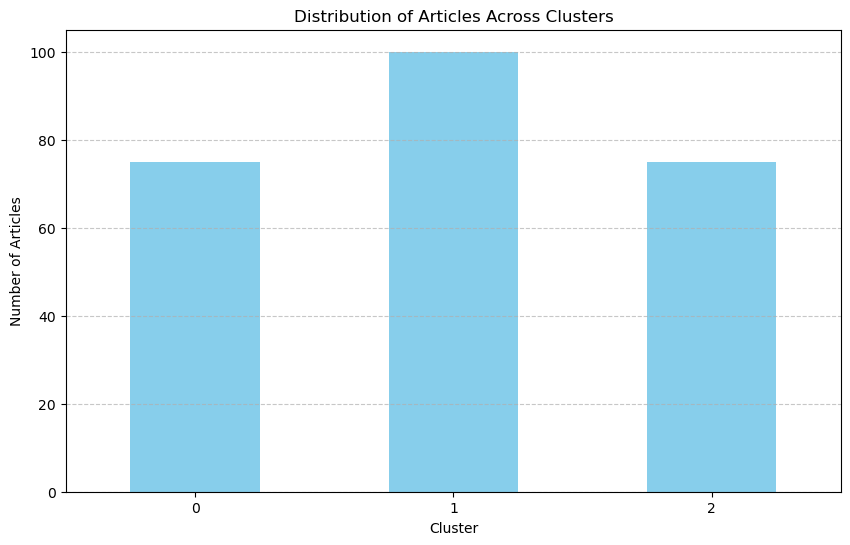

In [16]:
# Count the number of articles in each cluster
cluster_counts = df_1['Cluster'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Articles Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

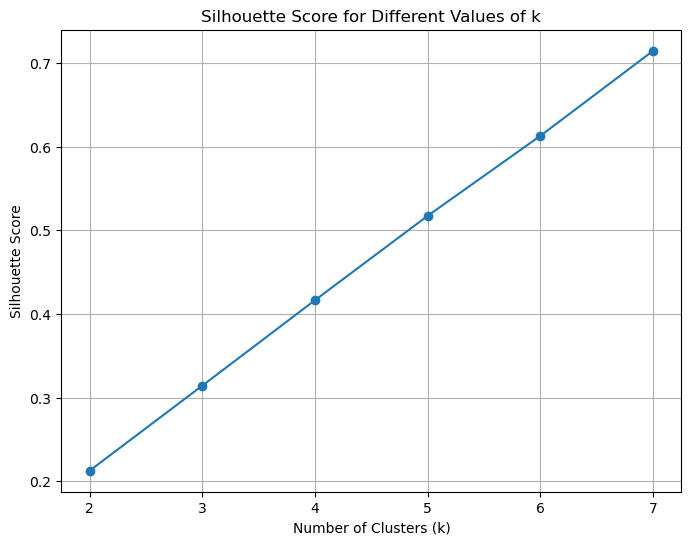

In [17]:
warnings.filterwarnings('ignore')
# Vectorize the text data
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_1['Combined_Text'])

# Define a function to perform k-means clustering and calculate silhouette score
def kmeans_cluster(k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_matrix)
    if len(np.unique(cluster_labels)) > 1:  # Check if there are at least 2 clusters
        silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
        return silhouette_avg, cluster_labels
    else:
        return None, None

# Define different values of k
k_values = [1, 2, 3, 4, 5, 6, 7]

# Perform k-means clustering for each k value and calculate silhouette scores
silhouette_scores = []
cluster_labels_list = []
for k in k_values:
    silhouette_avg, cluster_labels = kmeans_cluster(k)
    if silhouette_avg is not None:
        silhouette_scores.append(silhouette_avg)
        cluster_labels_list.append(cluster_labels)
    else:
        silhouette_scores.append(None)
        cluster_labels_list.append(None)

# Plot silhouette scores for different values of k
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

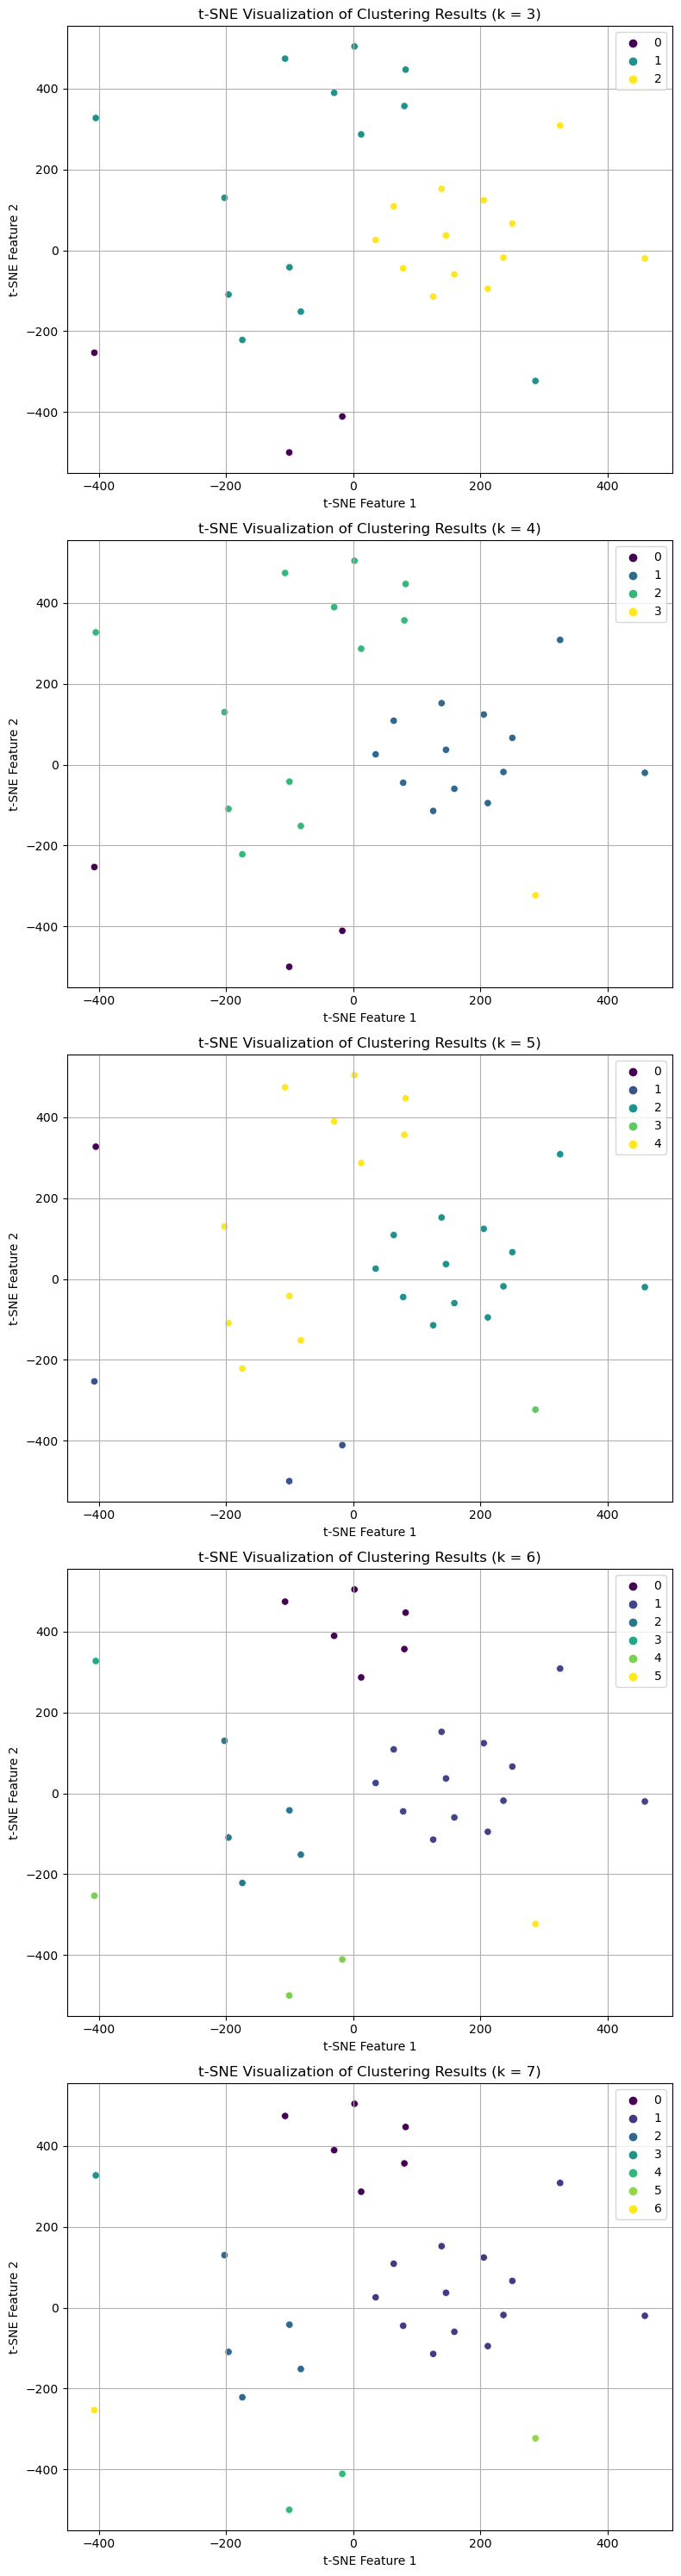

In [18]:
warnings.filterwarnings('ignore')
# Define the values of k for clustering
k_values = [3, 4, 5, 6, 7]

# Create subplots for each value of k
fig, axes = plt.subplots(len(k_values), 1, figsize=(8, 6 * len(k_values)))

# Initialize an empty list to store the cluster labels
cluster_labels_list = []

def visualize_tsne_results(ax, tsne_data):
    tsne_features, cluster_labels, k = tsne_data
    sns.scatterplot(ax=ax, x=tsne_features[:, 0], y=tsne_features[:, 1], hue=cluster_labels,
                    palette='viridis', legend='full')
    ax.set_title('t-SNE Visualization of Clustering Results (k = {})'.format(k))
    ax.set_xlabel('t-SNE Feature 1')
    ax.set_ylabel('t-SNE Feature 2')
    ax.grid(True)

# Loop through each value of k
for i, k in enumerate(k_values):
    # Perform k-means clustering for the current value of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_matrix)
    cluster_labels_list.append(cluster_labels)

    # Reduce the dimensionality of the TF-IDF matrix using t-SNE
    tsne_model = TSNE(n_components=2, random_state=42)
    tsne_features = tsne_model.fit_transform(tfidf_matrix.toarray())  # Convert sparse matrix to dense array
    
    # Store the t-SNE features and cluster labels in a tuple
    tsne_data = (tsne_features, cluster_labels, k)

    # Show the plots outside of the loop
    visualize_tsne_results(axes[i], tsne_data)

# Show the plots
plt.tight_layout()
plt.show()